In [8]:
!pip install python-dateutil

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

df = pd.read_csv('HARV_PlotLocations.csv')

In [14]:
df.columns

Index(['easting', 'northing', 'geodeticDa', 'utmZone', 'plotID', 'stateProvi',
       'county', 'domainName', 'domainID', 'siteID', 'plotType', 'subtype',
       'plotSize', 'elevation', 'soilTypeOr', 'plotdim_m'],
      dtype='object')

In [15]:
df.head()

easting     northing geodeticDa utmZone    plotID stateProvi     county  \
0  731405.307  4713456.299      WGS84     18N  HARV_015         MA  Worcester   
1  731934.336  4713414.977      WGS84     18N  HARV_033         MA  Worcester   
2  731754.336  4713114.977      WGS84     18N  HARV_034         MA  Worcester   
3  731724.336  4713594.977      WGS84     18N  HARV_035         MA  Worcester   
4  732125.307  4713846.299      WGS84     18N  HARV_036         MA  Worcester   

  domainName domainID siteID     plotType   subtype  plotSize  elevation  \
0  Northeast      D01   HARV  distributed  basePlot      1600     331.64   
1  Northeast      D01   HARV        tower  basePlot      1600     341.62   
2  Northeast      D01   HARV        tower  basePlot      1600     347.61   
3  Northeast      D01   HARV        tower  basePlot      1600     334.34   
4  Northeast      D01   HARV        tower  basePlot      1600     352.93   

    soilTypeOr  plotdim_m  
0  Inceptisols         40  
1  Inceptisols         40  
2  Inceptisols         40  
3    Histosols         40  
4  Inceptisols         40

In [16]:
df.tail()

easting     northing geodeticDa utmZone    plotID stateProvi  \
16  731724.336  4713744.977      WGS84     18N  HARV_048         MA   
17  731604.336  4713054.977      WGS84     18N  HARV_049         MA   
18  731634.336  4713174.977      WGS84     18N  HARV_050         MA   
19  731664.336  4712934.977      WGS84     18N  HARV_051         MA   
20  731844.336  4713834.977      WGS84     18N  HARV_052         MA   

       county domainName domainID siteID plotType   subtype  plotSize  \
16  Worcester  Northeast      D01   HARV    tower  basePlot      1600   
17  Worcester  Northeast      D01   HARV    tower  basePlot      1600   
18  Worcester  Northeast      D01   HARV    tower  basePlot      1600   
19  Worcester  Northeast      D01   HARV    tower  basePlot      1600   
20  Worcester  Northeast      D01   HARV    tower  basePlot      1600   

    elevation   soilTypeOr  plotdim_m  
16     336.70  Inceptisols         40  
17     348.85  Inceptisols         40  
18     345.74    Histosols         40  
19     351.76  Inceptisols         40  
20     343.01    Histosols         40

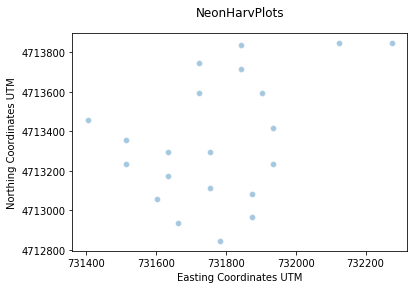

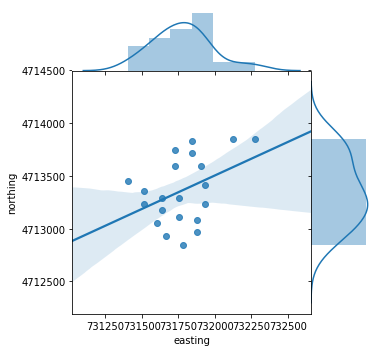

In [55]:
# Scatter Plot
plt.scatter(df['easting'], df['northing'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Easting Coordinates UTM')
plt.ylabel('Northing Coordinates UTM')
plt.title('NeonHarvPlots',y=1.05)


# Joint Plot
jp = sns.jointplot(x='easting', y='northing', data=df,
                   kind='reg', space=0, height=5, ratio=4)

Text(0.5, 0, 'Elevation (ft)')

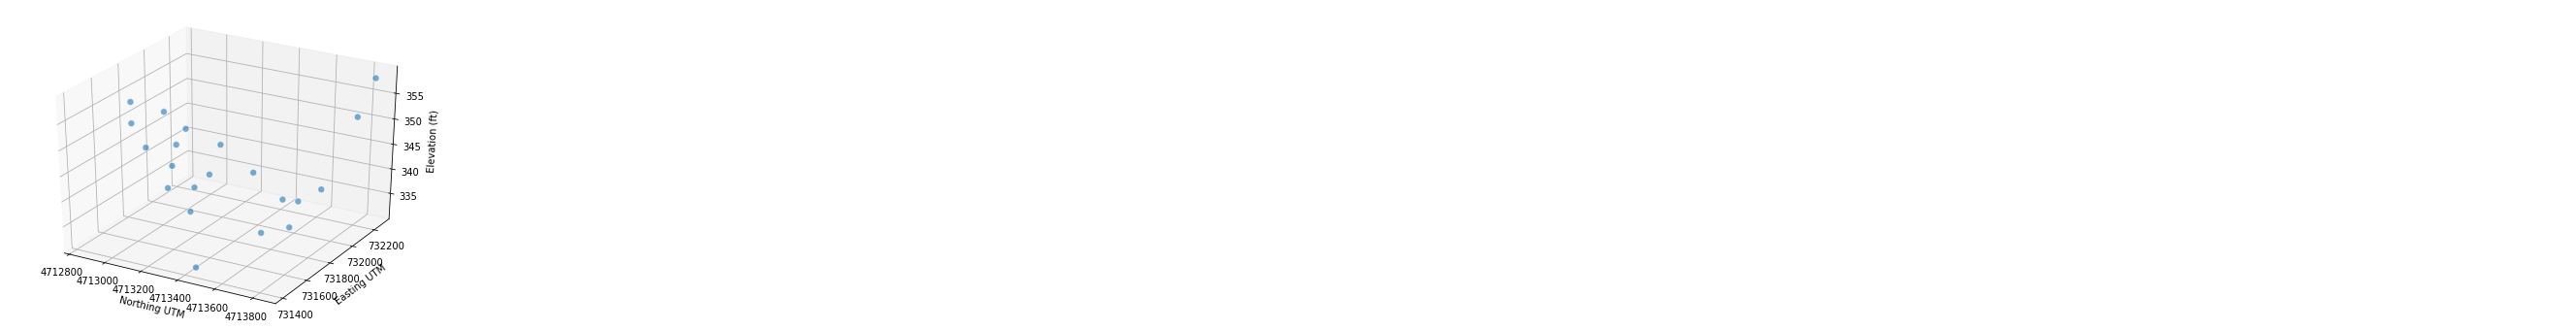

In [34]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['northing']
ys = df['easting']
zs = df['elevation']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Northing UTM')
ax.set_ylabel('Easting UTM')
ax.set_zlabel('Elevation (ft)')

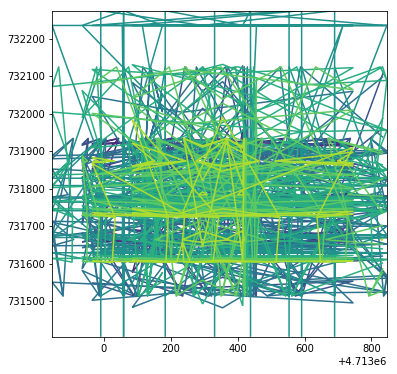

In [41]:
#x = df['northing']
#y = df['easting']
#z = df['elevation'] 
#x, y = np.meshgrid(x, y)


x = df['northing']
y = df['easting']
X, Y = np.meshgrid(x, y)


Z = np.sin(X)*np.cos(Y)


fig, ax = plt.subplots(figsize=(6,6))


ax.contour(X,Y,Z)


plt.show()

In [51]:
import plotly.graph_objects as go

fig = go.Figure(data =
     go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]],
        colorscale='Electric',
    ))
fig.show()

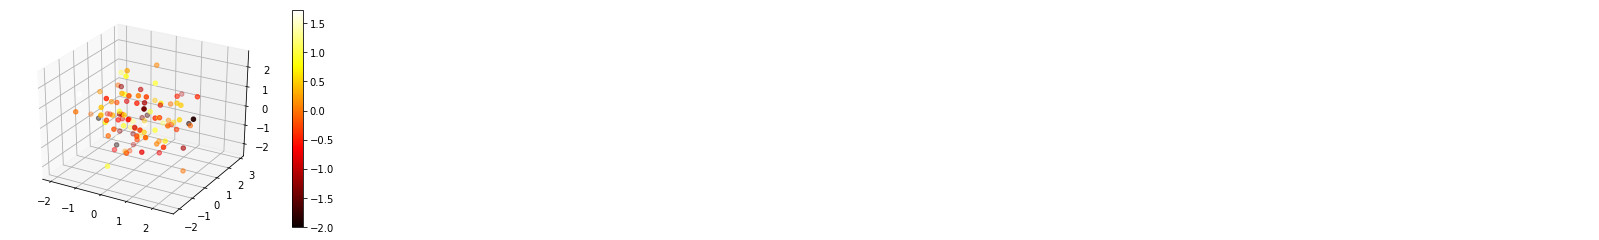

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)
c = np.random.standard_normal(100)

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

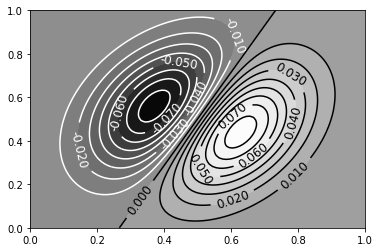

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X = np.linspace(0,1,100)
Y = X.copy()
X, Y = np.meshgrid(X, Y)
alpha = np.radians(25)
cX, cY = 0.5, 0.5
sigX, sigY = 0.2, 0.3
rX = np.cos(alpha) * (X-cX) - np.sin(alpha) * (Y-cY) + cX
rY = np.sin(alpha) * (X-cX) + np.cos(alpha) * (Y-cY) + cY

Z = (rX-cX)*np.exp(-((rX-cX)/sigX)**2) * np.exp(- ((rY-cY)/sigY)**2)
fig = plt.figure()
ax = fig.add_subplot(111)

# Reversed Greys colourmap for filled contours
cpf = ax.contourf(X,Y,Z, 20, cmap=cm.Greys_r)
# Set the colours of the contours and labels so they're white where the
# contour fill is dark (Z < 0) and black where it's light (Z >= 0)
colours = ['w' if level<0 else 'k' for level in cpf.levels]
cp = ax.contour(X, Y, Z, 20, colors=colours)
ax.clabel(cp, fontsize=12, colors=colours)
plt.show()